   **Defining the Question.**


**a) Specifying the Question**
Prediction of match results based on which team is at Home and which is away, the type of the tourament ie Friendly, Fifa World Cup etc and the Rank of the team.

**Approach 1: Polynomial approach What to train given the :**

Rank of away team

Rank of home team

Tournament Type

Model 1: Predict how many goals the home team scores

Model 2: Predict how many goals the away team scores


**Approach 2 Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

**b) Defining the Metric for Success**

Correctly merge the two datasets Perform Polynomial Regression and compare to the RMSE score and perform Logistic Regression

**c) Understanding the context**

The data contains two datasets with the ranking of the teams from 1993 to 2019 and the results between two teams within the same period.The results includes the scores that they won either at their home country or away.

Predicting the output of the matches to be played in the near future


In [0]:

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score



In [0]:
#loading ranking dataset
rank = pd.read_csv('/content/fifa_ranking.csv')


In [0]:
#previewing the first 5 rows
rank.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
#loading  results dataset
results = pd.read_csv('/content/results.csv')


In [0]:
#previewing the first five rows
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


                      
**Accessing the information on our dataset**

In [0]:
results.info


<bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [0]:
# the date is the wrong format so we changed to datetime
#results['date'] =  pd.to_datetime(results['date'], errors='coerce',format='%Y%M%D%')
results['date'] = results['date'].apply(pd.to_datetime)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
#confirming if the column has been converted
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [0]:
#accessing info on the ranking dataset
rank.info

<bound method DataFrame.info of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>

In [0]:
#the date column is in the wrong format
#converting the column date into datetime
rank['rank_date'] =  rank['rank_date'] .apply(pd.to_datetime)



In [0]:
#confirming if the column has been converted
rank.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [0]:
#checking for shape of the datasets
results.shape


(40839, 9)

In [0]:
rank.shape

(57793, 16)

In [0]:
#spliting the results datetime column into year, month and day
results['year'], results['month'], results['day'] = results['date'].dt.year, results['date'].dt.month, results['date'].dt.day
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,4


In [0]:
#splitting the rankdate column
rank['year'], rank['month'], rank['day'] = rank['rank_date'].dt.year, rank['rank_date'].dt.month, rank['rank_date'].dt.day
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8


In [0]:
# Merging the two dataset
merged_data=pd.merge( rank,results, left_on=['country_full','year','month'], right_on=['home_team','year','month'],how='inner')
merged_data.head(10)

merged_data.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
merged_data.head()

,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False,22
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,29
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8


In [0]:
new_merged_away=pd.merge( rank,results, left_on=['country_full','year','month'], right_on=['away_team','year','month'],how='inner')

new_merged_away.rename({'rank' : 'away_rank'}, axis = 1, inplace = True)
new_merged_away.head()

,away_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y
0,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11
1,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,15
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1


In [0]:
data = new_merged_away[['away_rank','year','month','away_team']]
data

,away_rank,year,month,away_team
0,3,1993,8,Switzerland
1,5,1993,8,Argentina
2,5,1993,8,Argentina
3,5,1993,8,Argentina
4,8,1993,8,Brazil
...,...,...,...,...
18521,139,2018,6,Botswana
18522,139,2018,6,Botswana
18523,155,2018,6,Mauritius
18524,163,2018,6,Belize


In [0]:
final_data=pd.merge( merged_data,data, left_on=['away_team','year','month'], right_on=['away_team','year','month'],how='inner')
final_data.head(10)

,home_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y,away_rank
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11,3
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False,22,12
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
5,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,29,70
6,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,29,70
7,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,29,70
8,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-15,Paraguay,Peru,2,1,FIFA World Cup qualification,Asunción,Paraguay,False,15,70
9,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8,8,1993-08-15,Paraguay,Peru,2,1,FIFA World Cup qualification,Asunción,Paraguay,False,15,70


In [0]:
#previewing the final data
final_data.shape

(28518, 30)

**EDA ANALYSIS**


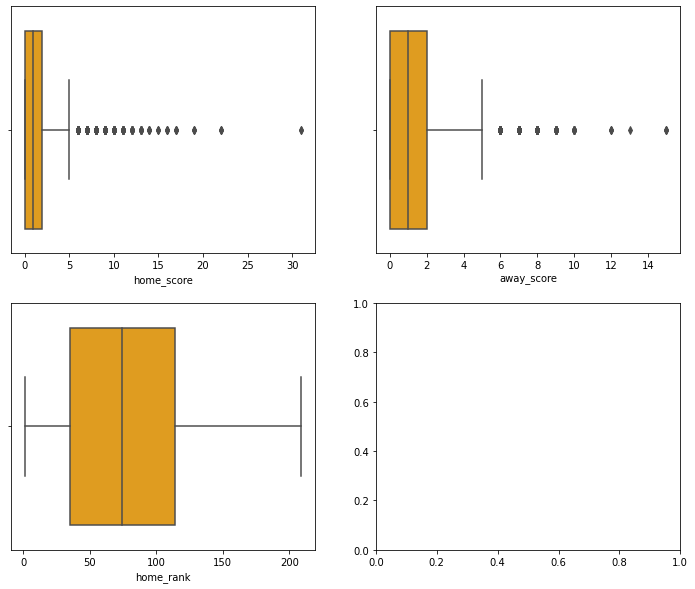

In [0]:
#Checking for outliers
# We define a new list containing the variables we want to observe.
columns = ['home_score', 'away_score','home_rank',]
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize=(12,10))

# We create a function to loop over the given multiple features.
for ax, data,column in zip(axes.flatten(),final_data,columns):
  sns.boxplot(final_data[column],ax=ax, color = 'orange')

In [0]:
#checking for missing data
final_data.isnull().sum()

home_rank                  0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
month                      0
day_x                      0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day_y                      0
away_rank                  0
dtype: int64

In [0]:
# checking for duplicates
final_data.duplicated().sum()

11614

In [0]:
#Dataset has 13 duplicate rows. We need to drop these.
final_data.drop_duplicates(keep=False,inplace=True) 
final_data.duplicated().sum()

0

In [0]:
final_data.columns

Index(['home_rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month', 'day_x', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'country', 'neutral', 'day_y',
       'away_rank'],
      dtype='object')

Text(0, 0.5, 'away_score')

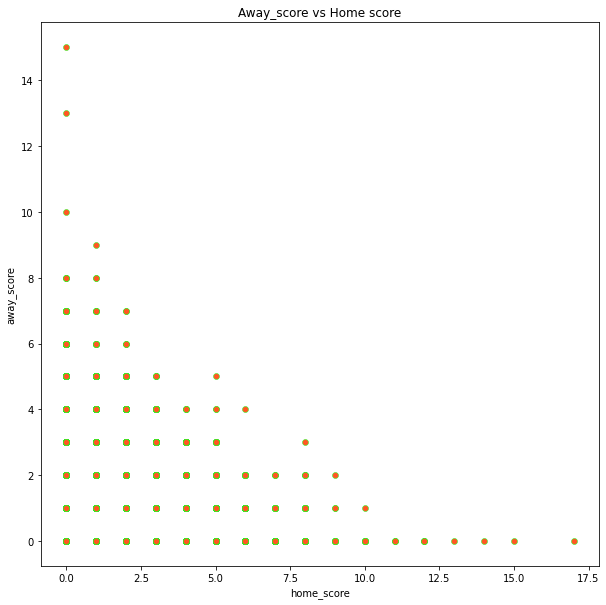

In [0]:
# scatter plot for home scores vs away scores
# plt.scatter(final_data['home_score'], final_data['away_score'])
#
plt.figure(figsize=(10,10))
plt.scatter(x=final_data['home_score'], y=final_data['away_score'], color='#ff5722', edgecolors="#1cff22", linewidths=0.5)
plt.title('Away_score vs Home score')
plt.xlabel('home_score')
plt.ylabel('away_score')

In [0]:
#create a function to define the three options for draw , win , loss

def results(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Loss'
  else:
    return 'Draw'

In [0]:
# Then we calculate the score difference by subtracting the home score minus the away score
final_data['scores'] = final_data['home_score'] - final_data['away_score']


In [0]:
#Create a new column called df that contains the three options from the function
final_data['df']=final_data['scores'].apply(lambda x :results(x))

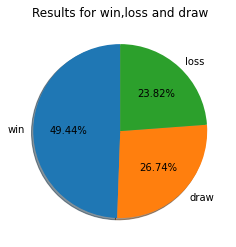

<Figure size 360x360 with 0 Axes>

In [0]:
#plotting the results  for win, loss and draw
plt.pie(final_data['df'].value_counts(), labels = ['win', 'draw', 'loss'],shadow=True, startangle=90, autopct='%1.2f%%')
plt.title('Results for win,loss and draw')
plt.figure(figsize = (5,5))
plt.show()


winning had the highest percentage of 49.44%

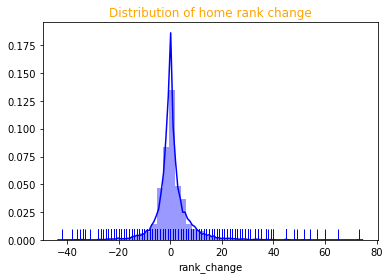

In [0]:
# a subplot to show the distribution of the home range change
plt.subplot()
sns.distplot(final_data["rank_change"],color="blue",rug=True)
plt.title("Distribution of home rank change",color='orange')
plt.show()

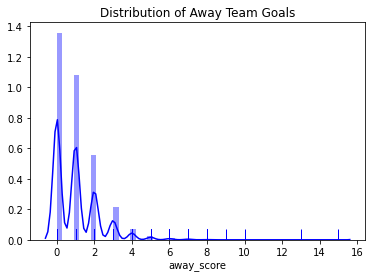

In [0]:
# a plot to show the distibution of away team goals
plt.subplot()
sns.distplot(final_data["away_score"],color="blue",rug=True)
plt.title("Distribution of Away Team Goals",color='black')
plt.show()

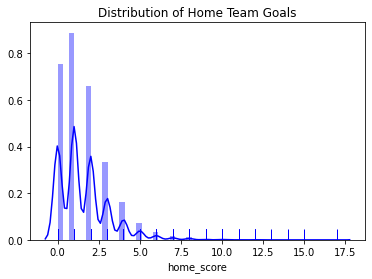

In [0]:
# a plot to show the distibution of the home team goals
plt.subplot()
sns.distplot(final_data["home_score"],color="blue",rug=True)
plt.title("Distribution of Home Team Goals",color='black')
plt.show()

In [0]:
final_data.groupby(['country', 'total_points','away_score']).max()


home_rank country_full  ... scores    df
country     total_points away_score                          ...             
Afghanistan 213.85       0                 139  Afghanistan  ...      3   Win
Albania     0.00         0                 109      Albania  ...      3   Win
                         1                 113      Albania  ...      5   Win
                         2                 109      Albania  ...      1   Win
                         3                  75      Albania  ...     -2  Loss
...                                        ...          ...  ...    ...   ...
Zimbabwe    357.81       1                  98     Zimbabwe  ...      2   Win
            359.27       1                 100     Zimbabwe  ...      1   Win
            433.97       0                  74     Zimbabwe  ...      2   Win
            461.69       1                  70     Zimbabwe  ...      1   Win
            489.54       0                  66     Zimbabwe  ...      3   Win

[3802 rows x 29 columns]

The Afghanistan is the top country,followed by albania basing on the away_score and the total points.

In [0]:
#checking for the country with the highest points based on the total_points

print(final_data[['rank_date','country','total_points']].sort_values('total_points',ascending=False).head(10))

print()


print('top points is',final_data['total_points'].max())

       rank_date    country  total_points
23869 2014-09-18    Germany       1765.05
23868 2014-09-18    Germany       1765.05
21280 2012-07-04    Ukraine       1691.12
24003 2014-10-23    Germany       1668.83
26347 2016-09-15  Argentina       1645.74
26900 2017-03-09  Argentina       1644.27
26582 2016-11-24  Argentina       1634.02
27594 2017-10-16    Germany       1631.05
26444 2016-10-20  Argentina       1621.32
27595 2017-10-16     Brazil       1618.63

top points is 1765.05


**Prediction Dataset**

In [0]:
#We create a new dataframe with the columns  that are required for prediction.

predict_data= final_data[['away_rank','home_rank','away_team','home_team', 'home_score','away_score','tournament','df']]
print(predict_data.shape)
predict_data.head(5)

(9432, 8)


,away_rank,home_rank,away_team,home_team,home_score,away_score,tournament,df
0,3,4,Switzerland,Sweden,1,2,Friendly,Loss
1,12,4,France,Sweden,1,1,FIFA World Cup qualification,Draw
15,14,8,Mexico,Brazil,1,1,Friendly,Draw
25,59,8,Bolivia,Brazil,6,0,FIFA World Cup qualification,Win
26,84,10,Lithuania,Denmark,4,0,FIFA World Cup qualification,Win


**Mulcollineality**

In [0]:
predict_data.corr()

,away_rank,home_rank,home_score,away_score
away_rank,1.000000,0.390367,0.341376,-0.235451
home_rank,0.390367,1.000000,-0.174816,0.217920
home_score,0.341376,-0.174816,1.000000,-0.167827
away_score,-0.235451,0.217920,-0.167827,1.000000


The independent variables are not highly correlated hence we can use the variables for our model

**Model 1 is for predicting how many goals the home away team scored**

In [0]:
predict_data.columns

Index(['away_rank', 'home_rank', 'away_team', 'home_team', 'home_score',
       'away_score', 'tournament', 'df'],
      dtype='object')

In [0]:
#We create labels for the categorical tournament column. This is called encoding.

lb_make = LabelEncoder()
predict_data['tournament_df'] = lb_make.fit_transform(predict_data['tournament'])
predict_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,away_rank,home_rank,away_team,home_team,home_score,away_score,tournament,df,tournament_df
0,3,4,Switzerland,Sweden,1,2,Friendly,Loss,27
1,12,4,France,Sweden,1,1,FIFA World Cup qualification,Draw,26
15,14,8,Mexico,Brazil,1,1,Friendly,Draw,27
25,59,8,Bolivia,Brazil,6,0,FIFA World Cup qualification,Win,26
26,84,10,Lithuania,Denmark,4,0,FIFA World Cup qualification,Win,26


In [0]:
# obtaining the attributes and the label
X = predict_data[['away_score', 'tournament_df','home_rank','away_rank']].values
y = predict_data['home_score']

In [0]:
# splitting using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Fit Linear Regression model to the dataset
# used to compare the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# making predictions 
y_pred = np.round(pol_regressor.predict(X_test_poly),3)

In [0]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

       Actual  Predicted
16812       2      0.500
18585       3      0.874
2804        2      1.273
27575       0      0.712
21689       0      1.543


,Actual,Predicted
count,1887.000000,1887.000000
mean,1.609433,1.632197
std,1.586186,0.809183
min,0.000000,0.217000
25%,0.000000,1.080500
50%,1.000000,1.504000
75%,2.000000,2.008500
max,17.000000,5.899000


In [0]:
# We compute RMSE to see the Error rate
print('Root Mean Squared Error:', np.round(np.sqrt((metrics.mean_squared_error(y_test,y_pred))),4))

Root Mean Squared Error: 1.3923


The root mean squared score is 1.3923 while to show that the model is not accurate hence can't be used for prediction

**Residual plots and Heteroskedasticity testing** 

In [0]:
#Step 1
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

#Step 2
# statistical description
residual = pd.DataFrame(residuals).describe()

#Step 3
# mean 
residuals.mean()

0.022764175940646524

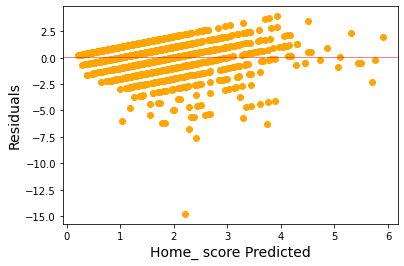

In [0]:
#Step 4
#residual plot of actual vs predicted
plt.scatter(y_pred, residuals, color = 'orange')
plt.ylabel('Residuals', fontsize = 14)
plt.xlabel('Home_ score Predicted', fontsize = 14)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 0.5)
plt.show()

**Barlett's Test**

In [0]:
#If the test_result is greater than the critical value, reject the null hypothesis. 
# identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


**Model 2: Predict how many goals the away team scores.**

In [0]:
predict_data2 = predict_data[['home_score','away_score','tournament','home_rank','away_rank']]
predict_data2.head(5)

,home_score,away_score,tournament,home_rank,away_rank
0,1,2,Friendly,4,3
1,1,1,FIFA World Cup qualification,4,12
15,1,1,Friendly,8,14
25,6,0,FIFA World Cup qualification,8,59
26,4,0,FIFA World Cup qualification,10,84


In [0]:
lb_make = LabelEncoder()
predict_data2['tournament_df1'] = lb_make.fit_transform(predict_data2['tournament'])
predict_data2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,home_score,away_score,tournament,home_rank,away_rank,tournament_df1
0,1,2,Friendly,4,3,27
1,1,1,FIFA World Cup qualification,4,12,26
15,1,1,Friendly,8,14,27
25,6,0,FIFA World Cup qualification,8,59,26
26,4,0,FIFA World Cup qualification,10,84,26


In [0]:
# obtaining the attributes and the label
X = predict_data2[['home_score', 'tournament_df1','home_rank','away_rank']].values
y = predict_data2['away_score']

In [0]:
# Variance inflation factor
x1 = X.copy()
x1 = pd.DataFrame(x1,columns=['home_score', 'tournament_df1','home_rank','away_rank'])
x1

,home_score,tournament_df1,home_rank,away_rank
0,1,27,4,3
1,1,26,4,12
2,1,27,8,14
3,6,26,8,59
4,4,26,10,84
...,...,...,...,...
9427,1,10,129,94
9428,0,14,137,123
9429,6,14,139,155
9430,0,14,147,118


In [0]:
from sklearn.preprocessing import Normalizer
correlation = x1.corr()
correlation

,home_score,tournament_df1,home_rank,away_rank
home_score,1.000000,-0.008287,-0.174816,0.341376
tournament_df1,-0.008287,1.000000,-0.197942,-0.200102
home_rank,-0.174816,-0.197942,1.000000,0.390367
away_rank,0.341376,-0.200102,0.390367,1.000000


In [0]:
#Computing the variation inflation factor
vif = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
vif

,home_score,tournament_df1,home_rank,away_rank
home_score,1.296683,-0.022645,0.468098,-0.629919
tournament_df1,-0.022645,1.060820,0.141740,0.164672
home_rank,0.468098,0.141740,1.369959,-0.666223
away_rank,-0.629919,0.164672,-0.666223,1.508062


All the scores are below 5 which means there is no collinearity so we will not drop the independent variable.

In [0]:

# splitting using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [88]:
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
poly2 = PolynomialFeatures(degree = 2)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.fit_transform(X_test)
poly2.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# making predictions 
y_pred = np.round(pol_regressor.predict(X_test_poly),3)

In [92]:
#comparing the results of the predicted with the actual results in the y-test data
compare = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare.head())
compare.describe()

       Actual  Predicted
16812       2      2.557
18585       1      1.510
2804        1      1.231
27575       3      1.802
21689       1      0.873


,Actual,Predicted
count,1887.000000,1887.000000
mean,1.002120,1.036256
std,1.098536,0.561626
min,0.000000,-0.213000
25%,0.000000,0.651000
50%,1.000000,0.948000
75%,2.000000,1.276500
max,7.000000,4.392000


In [93]:
# We compute RMSE to see the Error rate
print('Root Mean Squared Error:', np.round(np.sqrt((metrics.mean_squared_error(y_test,y_pred))),4))

Root Mean Squared Error: 1.0214


The Root Mean Squared Score is 1.0214,it shows the the model is not accurate so we can't use it for prediction.

**Residual Plots and Heteroskedasticity Testing**

In [94]:

#residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)
pd.DataFrame(residuals).describe()

# the mean
residuals.mean()

0.03413672496025435

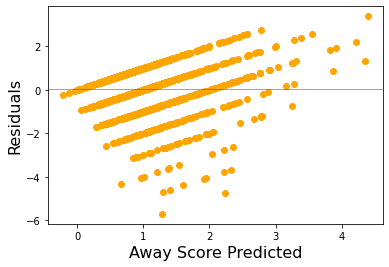

In [98]:
#We plot the residual plot
plt.scatter(y_pred, residuals, color = 'orange')
plt.ylabel('Residuals', fontsize = 16)
plt.xlabel('Away Score Predicted', fontsize = 16)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 0.5)
plt.show()

**Approach Two**

**Logistic Approach**

In [0]:
# creating a function to convert tournament type to world Cup, Friendly and other 
def tournament(z): 
    if (z == 'Friendly'):
        return 'Friendly'
    elif (z == 'FIFA World Cup qualification') or (z == 'FIFA World Cup') :
        return 'World cup'
    else:
        return 'Other'

In [102]:
predict_data['tournament_type'] = predict_data.tournament.apply(lambda x: tournament(x))
predict_data.head(5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,away_rank,home_rank,away_team,home_team,home_score,away_score,tournament,df,tournament_df,tournament_type
0,3,4,Switzerland,Sweden,1,2,Friendly,Loss,27,Friendly
1,12,4,France,Sweden,1,1,FIFA World Cup qualification,Draw,26,World cup
15,14,8,Mexico,Brazil,1,1,Friendly,Draw,27,Friendly
25,59,8,Bolivia,Brazil,6,0,FIFA World Cup qualification,Win,26,World cup
26,84,10,Lithuania,Denmark,4,0,FIFA World Cup qualification,Win,26,World cup


In [106]:
#Create new dataframe with the columns required for this approach
logistic_df = predict_data[['away_rank','home_rank','away_score','home_score','home_team','away_team','tournament_type','df']]
logistic_df.head()

,away_rank,home_rank,away_score,home_score,home_team,away_team,tournament_type,df
0,3,4,2,1,Sweden,Switzerland,Friendly,Loss
1,12,4,1,1,Sweden,France,World cup,Draw
15,14,8,1,1,Brazil,Mexico,Friendly,Draw
25,59,8,0,6,Brazil,Bolivia,World cup,Win
26,84,10,0,4,Denmark,Lithuania,World cup,Win


In [113]:
#We encode the categorical column i.e tournament type and status
lb = LabelEncoder()
logistic_df['tournament_type'] = lb.fit_transform(logistic_df['tournament_type'])
logistic_df['df'] = lb.fit_transform(logistic_df['df'])

logistic_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,away_rank,home_rank,away_score,home_score,home_team,away_team,tournament_type,df
0,3,4,2,1,Sweden,Switzerland,0,1
1,12,4,1,1,Sweden,France,2,0
15,14,8,1,1,Brazil,Mexico,0,0
25,59,8,0,6,Brazil,Bolivia,2,2
26,84,10,0,4,Denmark,Lithuania,2,2


In [114]:
# Create dataframe for logistic regression
data2= logistic_df[['home_score','away_score','home_rank','away_rank','tournament_type','df']]
data2.head()

,home_score,away_score,home_rank,away_rank,tournament_type,df
0,1,2,4,3,0,1
1,1,1,4,12,2,0
15,1,1,8,14,0,0
25,6,0,8,59,2,2
26,4,0,10,84,2,2


In [0]:
X = data2[['home_score','away_score','home_rank','away_rank','tournament_type']].values
y = data2['df']

In [0]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# fitting the model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [118]:
# making prediction
y_pred = LogReg.predict(X_test)
y_pred

array([0, 2, 2, ..., 1, 0, 1])

In [119]:
#  comparison
comparison = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comparison.head()

,Actual,Predicted
16812,0,0
18585,2,2
2804,2,2
27575,1,1
21689,1,1


In [120]:
comparison.describe()

,Actual,Predicted
count,1887.000000,1887.000000
mean,1.258612,1.258612
std,0.815998,0.815998
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,2.000000,2.000000


In [121]:
# evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix','\n',confusion_matrix)
classification_report = classification_report(y_test, y_pred)
print('classification_report','\n',classification_report)

confusion_matrix 
 [[447   0   0]
 [  0 505   0]
 [  0   0 935]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       505
           2       1.00      1.00      1.00       935

    accuracy                           1.00      1887
   macro avg       1.00      1.00      1.00      1887
weighted avg       1.00      1.00      1.00      1887



**Conclusion**
The model has 100% accuracy, which cannot be good since it predicted everything correctly

Use current ranking to make near future predictions